In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
merged_data = pd.read_pickle('merged_data.pkl')

In [4]:
merged_data['1day significant label'] = merged_data['1day significant label'].abs()

# Create train data and test data

In [5]:
X = merged_data['rawText']
y = merged_data['1day significant label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Tf-Idf and LogisticRegression model

In [36]:
tfidf = TfidfVectorizer(max_df=0.3, min_df=200, ngram_range=(1,3), stop_words='english')

In [26]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [27]:
X_train_tfidf.shape

(4114, 2997)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_predicted = model.predict(tfidf.transform(X_test))

In [32]:
cm = confusion_matrix(y_test, y_predicted)

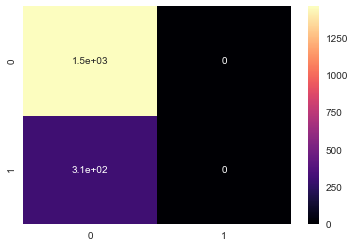

In [33]:
sns.heatmap(cm, cmap='magma', annot=True)

In [34]:
cr = classification_report(y_test, y_predicted)
print(cr)

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      1458
          1       0.00      0.00      0.00       306

avg / total       0.68      0.83      0.75      1764



C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
accuracy_score(y_test, y_predicted)

0.82653061224489799